# Lending Club - Risk Analysis

A consumer finance company (lendingclub.com) which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.

### Business Objectives :

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 



### Types of Risks :

The are 2 types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

We have the data that contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

<img src="Loan_image.png">

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1) Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

 - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

 - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

 - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2) Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

##### Importing all the necessary libraries for the analysis

In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.patches as mpatches

##### Reading the datasets from csv files and performing basic checks

In [2]:
loan_data = pd.read_csv('loan.csv', encoding = "ISO-8859-1")
pd.set_option('display.max_columns', None)

In [3]:
#Viewing the dataset
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#Shape of the dataset
loan_data.shape

(39717, 111)

In [5]:
#info of dataset ( We see that there are 39717 Rows and 111 Columns )
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## <u>Data Cleaning</u>

Actions performed to clean the data are:
    
- Finding the percentage of Missing values and of each column.- Merged the dataframes into one master dataframe
- Dropped records with missing values in various columns with more than 90% threshold
- Dropped irrelevant columns which are not useful for the data analysis
- Identified Numerical and categorical columns and dealt with them accordingly
- Converted incorrect data types
- Dropped insignificant null record of low percentage of missing values
- Derived new columns using existing columns
- Filtered loan_status into "Fully paid" or "Charged off" 

In [6]:
#Finding the percentage of Missing values and of each column.
missing_values = loan_data.isnull().sum() * 100 / len(loan_data)
missing_values

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [7]:
# Number of columns having missing values
len(missing_values)

111

We see that all columns have missing values hence lets remove the columns whose missing values are more than or equal to 90% as a standard data cleaning process.

In [8]:
#Finding the number of columns having missing values more than or equal to 90% and dropping them
missing_value_col = list(missing_values[missing_values >= 90].index)
len(missing_value_col)

56

There were `56 columns` with more than `90% missing values` and so we drop them

In [9]:
#Dropping missing values with more than 90%
loan_data = loan_data.drop(missing_value_col, axis=1)
loan_data.shape

(39717, 55)

In [10]:
loan_data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
#Checking the remaining columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

We identify that there a few columns are irrelevant to the Data analysis and are not needed, Hence we can go ahead and remove them

Below are the irrelevant columns which we can remove

- <b>desc</b> : Loan description provided by the borrower
- <b>member_id</b> : A unique LC assigned Id for the borrower member
- <b>url</b> : URL for the LC page with listing data
- <b>mths_since_last_delinq</b> : The number of months since the borrower's last delinquency
- <b>delinq_amnt</b> : The past-due amount owed for the accounts on which the borrower is now delinquent
- <b>acc_now_delinq</b> : The number of accounts on which the borrower is now delinquent
- <b>application_type</b> : Indicates whether the loan is an individual application or a joint application with two co-borrowers
- <b>policy_code</b> : publicly available policy_code=1 | new products not publicly available policy_code=2
- <b>pymnt_plan</b> : Indicates if a payment plan has been put in place for the loan
- <b>initial_list_status</b> : The initial listing status of the loan
- <b>chargeoff_within_12_mths</b> : Number of charge-offs within 12 months
- <b>tax_liens</b> : Number of tax liens
- <b>collections_12_mths_ex_med</b> : Number of collections in 12 months excluding medical collections
- <b>zip_code</b> : The first 3 numbers of the zip code provided by the borrower in the loan application.
- <b>recoveries</b> : post charge off gross recovery
- <b>total_rec_prncp</b> : Principal received to date
- <b>total_rec_int</b> : Interest received to date
- <b>total_rec_late_fee</b> : Late fees received to date
- <b>collection_recovery_fee</b> : post charge off collection fee
- <b>last_pymnt_amnt</b> : Last total payment amount received
- <b>total_pymnt</b> : Payments received to date for total amount funded
- <b>total_pymnt_inv</b> : Payments received to date for portion of total amount funded by investors

The columns` collections_12_mths_ex_med`, `chargeoff_within_12_mths` and `tax_liens` only have values `0` or `nan` values and hence won't add any necessary value on our analysis. Hence we will be dropping a total of `22 columns` which are irrelevant

In [12]:
#Dropping irrelevant columns
loan_data = loan_data.drop(['desc', 'member_id', 'url', 'mths_since_last_delinq','delinq_amnt',
                            'acc_now_delinq', 'application_type', 'policy_code', 'pymnt_plan', 'initial_list_status',
                             'chargeoff_within_12_mths', 'tax_liens', 'collections_12_mths_ex_med',
                           "zip_code", 'recoveries', 'total_rec_prncp', 'total_rec_int',
                            'total_rec_late_fee', 'collection_recovery_fee', 'last_pymnt_amnt',
                           'total_pymnt','total_pymnt_inv'], axis=1)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  object 
 5   int_rate              39717 non-null  object 
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   sub_grade             39717 non-null  object 
 9   emp_title             37258 non-null  object 
 10  emp_length            38642 non-null  object 
 11  home_ownership        39717 non-null  object 
 12  annual_inc            39717 non-null  float64
 13  verification_status   39717 non-null  object 
 14  issue_d               39717 non-null  object 
 15  loan_status        

In [13]:
loan_data.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,Jan-15,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,Apr-13,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0,0.0,Jun-14,May-16,0.0


In [14]:
#Checking the remaining missing value columns
missing_values = round(100*(loan_data.isnull().sum()/len(loan_data.id)), 2)
missing_values = missing_values[missing_values > 0]
missing_values

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

#### Identifying Categorical columns by counting the unique values

In [15]:
print("Unique values of emp_title :            %d"  % len(loan_data.emp_title.unique()))
print("Unique values of emp_length :           %d"  % len(loan_data.emp_length.unique()))
print("Unique values of title :                %d"  % len(loan_data.title.unique()))
print("Unique values of revol_util :           %d"  % len(loan_data.revol_util.unique()))
print("Unique values of last_pymnt_d :         %d"  % len(loan_data.last_pymnt_d.unique()))
print("Unique values of last_credit_pull_d :   %d"  % len(loan_data.last_credit_pull_d.unique()))
print("Unique values of pub_rec_bankruptcies : %d"  % len(loan_data.pub_rec_bankruptcies.unique()))

Unique values of emp_title :            28821
Unique values of emp_length :           12
Unique values of title :                19616
Unique values of revol_util :           1090
Unique values of last_pymnt_d :         102
Unique values of last_credit_pull_d :   107
Unique values of pub_rec_bankruptcies : 4


We can clearly tell that `emp_length` & `pub_rec_bankruptcies` are categorical columns and so lets look into them in more depth

In [16]:
#Checking 'emp_length' column in depth
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

We see that `emp_length` contains Employment length in years (Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years) and it also contains `nan` values hence lets remove them

In [17]:
#Dropping Null records in 'emp_length' column
loan_data=loan_data[~loan_data.emp_length.isnull()]

In [18]:
#Checking 'pub_rec_bankruptcies' column in depth
loan_data.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

We see that `pub_rec_bankruptcies` contains number of public record bankruptcies of a particular borrower and it only contains values such as  `0`,  `1`,  `2`,`nan`. Hence check how many records does each value hold.

In [19]:
loan_data.pub_rec_bankruptcies.value_counts()

0.0    36375
1.0     1563
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

According to the above information, we can go ahead and drop the null values in the column

In [20]:
#Dropping Null records in 'pub_rec_bankruptcies' column
loan_data=loan_data[~loan_data.pub_rec_bankruptcies.isnull()]

In [21]:
#Checking the remaining missing value columns
missing_values = round(100*(loan_data.isnull().sum()/len(loan_data.id)), 2)
missing_values = missing_values[missing_values > 0]
missing_values

emp_title       3.68
title           0.03
revol_util      0.12
last_pymnt_d    0.17
dtype: float64

It seems that the left over missing values are containing insignificant percentage of missing values and dropping the records would not effect our analysis 

In [22]:
#Dropping Null records in remaining missing value columns
loan_data=loan_data[~loan_data.emp_title.isnull()]
loan_data=loan_data[~loan_data.title.isnull()]
loan_data=loan_data[~loan_data.revol_util.isnull()] 
loan_data=loan_data[~loan_data.last_pymnt_d.isnull()]

In [23]:
#Checking the shape of the cleaned dataset
loan_data.shape

(36433, 33)

In [24]:
#Confirming if any missing values are left out
loan_data.isnull().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
out_prncp               0
out_prncp_inv           0
last_pymnt_d            0
last_credit_pull_d      0
pub_rec_bankruptcies    0
dtype: int64

In [25]:
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,Apr-13,Sep-13,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,Jan-15,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,May-16,May-16,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,Jan-15,Jan-16,0.0
6,1069639,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,May-16,May-16,0.0


Since we know that loans which are marked `Current` is where applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed and these candidates are not labelled as 'defaulted'. Hence we can go ahead and ignore them

In [26]:
#Considering only 'Fully Paid' and 'Charged off' loans
loan_data.loan_status = loan_data.loan_status.astype('category')
loan_data = loan_data = loan_data[loan_data['loan_status'].isin(['Fully Paid','Charged Off'])]

#### Correcting Datatypes of columns

From the above dataset we see that a few columns have `object` datatypes and we can go ahead and fix them by converting them into `int` or `float`

In [27]:
#Checking the datatypes
loan_data.dtypes

id                         int64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv          float64
term                      object
int_rate                  object
installment              float64
grade                     object
sub_grade                 object
emp_title                 object
emp_length                object
home_ownership            object
annual_inc               float64
verification_status       object
issue_d                   object
loan_status             category
purpose                   object
title                     object
addr_state                object
dti                      float64
delinq_2yrs                int64
earliest_cr_line          object
inq_last_6mths             int64
open_acc                   int64
pub_rec                    int64
revol_bal                  int64
revol_util                object
total_acc                  int64
out_prncp                float64
out_prncp_inv            float64
last_pymnt

We see that `emp_length` column has values such as `< 1 year`, `10+ years`, `3 years` which make it a `object` datatype hence lets replace the values so that they can be converted into numeric values and `int` datatype

In [28]:
loan_data.emp_length.value_counts()

10+ years    8028
2 years      4083
< 1 year     3978
3 years      3833
4 years      3206
5 years      3043
1 year       2959
6 years      2062
7 years      1638
8 years      1361
9 years      1176
Name: emp_length, dtype: int64

In [29]:
#Replacing exisiting values with numerical values for emp_length
emp_length_values = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10}

loan_data = loan_data.replace({"emp_length": emp_length_values})

There are a few datetype columns which have month and year as their values but are of "object" datatype, hence we need to covert them into date-time

Below are the columns we need to convert:
 - issue_d
 - earliest_cr_line
 - last_pymnt_d
 - last_credit_pull_d

In [30]:
#Converting above mentioned columns to datatime dtype
loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data.earliest_cr_line = pd.to_datetime(loan_data.earliest_cr_line, format='%b-%y')
loan_data.last_pymnt_d = pd.to_datetime(loan_data.last_pymnt_d, format='%b-%y')
loan_data.last_credit_pull_d = pd.to_datetime(loan_data.last_credit_pull_d, format='%b-%y')

#Creating new variables for 'issue_d' by splitting them into month and year
loan_data['issue_d_month'] = loan_data['issue_d'].dt.month
loan_data['issue_d_year'] = loan_data['issue_d'].dt.year

We can now see that columns `int_rate` & `revol_util` have a `%` sign in the end which has defaulted them to a 'object' datatype hence we can go ahead and remove the `%` sign and convert them into `float` datatype

In [31]:
#Removing the % sign and converting them into float datatype
loan_data.int_rate = loan_data.int_rate.apply(lambda x: x.replace('%', ''))
loan_data.revol_util = loan_data.revol_util.apply(lambda x: x.replace('%', ''))
loan_data.int_rate = loan_data.int_rate.astype(float)
loan_data.revol_util = loan_data.revol_util.astype(float)

Additionally we can go ahead and drop the `id` column as it holds no significance

In [32]:
loan_data = loan_data.drop('id',axis =1 )

In [33]:
#Viewing the cleaned dataset
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0,0.0,2013-04-01,2013-09-01,0.0,12,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,0.0,2015-01-01,2016-04-01,0.0,12,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,0.0,2015-01-01,2016-01-01,0.0,12,2011
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,0.0,2016-05-01,2016-05-01,0.0,12,2011
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,CA,5.35,0,2007-01-01,2,4,0,8221,87.5,4,0.0,0.0,2015-01-01,2014-12-01,0.0,12,2011


## <u>Data Analysis</u>

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan.

There are broadly 3 types of variables -

- Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.)
- Loan characteristics (amount of loan, interest rate, purpose of loan etc.)
- Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

### ‣ Univariate Analysis

Here the target variable is `loan_status` and it has values such as `Fully Paid` and `Charged off`. Hence lets convert them into numberical values `1` indicating that the person has `defaulted` and `0` `otherwise`.

In [34]:
#Converting Loan statuses into numberical values of 1 and 0
loan_data.loan_status = loan_data.loan_status.apply(lambda x: 0 if x=='Fully Paid' else 1)

#Converting loan_status to integer type
loan_data.loan_status = loan_data.loan_status.astype(int)

#Checking the values
loan_data.loan_status.value_counts()


0    30424
1     4943
Name: loan_status, dtype: int64

#### To calulate the overall default rate, Lets find the mean of the `loan status`

In [35]:
#Calculating mean of default rate of the loans
round(np.mean(loan_data['loan_status']), 2)

0.14

#### Lets also check the mean of `loan amount`

In [36]:
#Calculating mean of loan amount
round(loan_data['loan_amnt'].mean())

11133

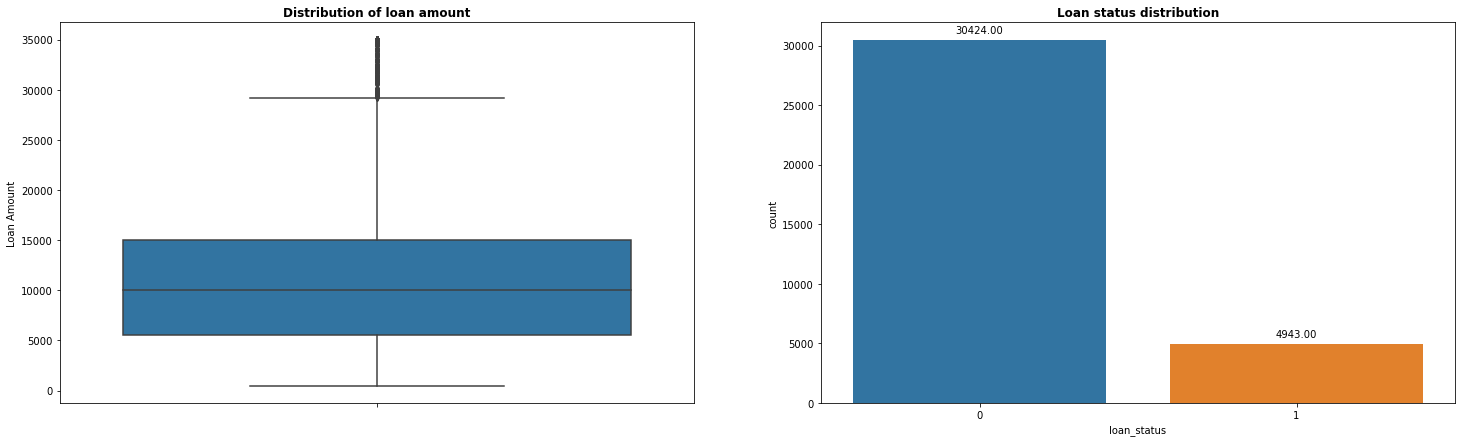

In [37]:
plt.figure(figsize=(25, 7))

#Plotting box plot for loan amount
plt.subplot(1, 2, 1)
sns.boxplot( y=loan_data["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.title("Distribution of loan amount", weight ='bold')


#Plotting countplot for loan status (default rate)
plt.subplot(1, 2, 2)
a = sns.countplot(x= loan_data["loan_status"])
for p in a.patches:
    a.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Loan status distribution", weight ='bold')
plt.show()

<b>Observations</b> :
- Overall default rate is of 14%, Hence anything above that can be considered as risky
- The loan amount is from 0 to 35,000 having mean of 11,133
- About 14.5% of total loans are default

#### Plotting default rates across variables such as grade, term & subgrade

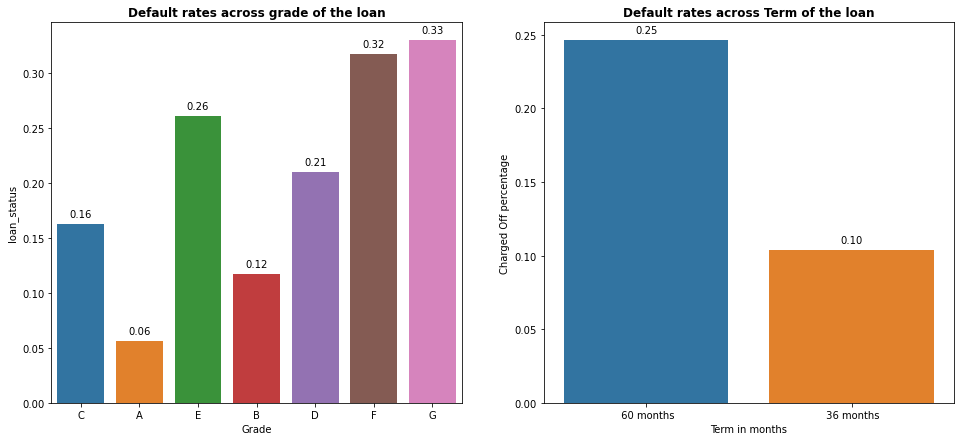

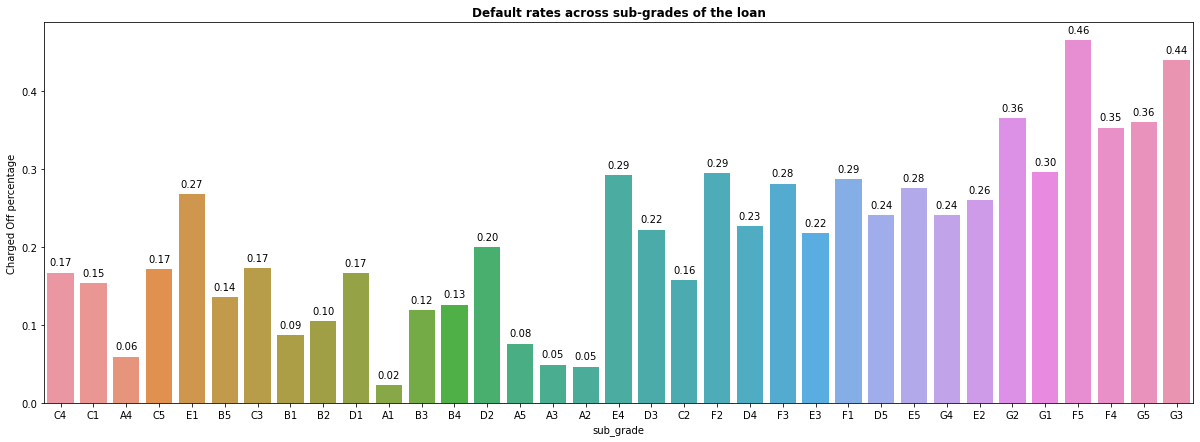

In [38]:
plt.figure(figsize=(25, 7))

# Plot 1: plotting default rates across grade of the loans
plt.subplot(1, 3, 1)
ax = sns.barplot(x='grade', y='loan_status', data=loan_data, ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Default rates across grade of the loan", weight ='bold')
plt.xlabel("Grade")

# Plot 2: plotting default rates across term of the loans

plt.subplot(1, 3, 2)
axc = sns.barplot(x ='term', y ='loan_status', data = loan_data, ci=None) 
for p in axc.patches:
    axc.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Default rates across Term of the loan", weight ='bold')
plt.ylabel("Charged Off percentage")
plt.xlabel("Term in months")

# Plot 3: plotting default rates across sub-grade of the loans
plt.figure(figsize=(70,7))
plt.subplot(1, 3, 3)
axcs = sns.barplot(x ='sub_grade', y ='loan_status', data = loan_data, ci=None)
for p in axcs.patches:
    axcs.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Default rates across sub-grades of the loan", weight ='bold')
plt.ylabel("Charged Off percentage")

plt.show()

<b>Observations</b> :
 - Default rate increases from grade A to G
 - 60 months loans default more than 36 months loans
 - The default rate increase across sub grades (Example : A1 to A5 keeps increasing with A1 being the lowest A5 being the highest) and the same trend can be observed with other sub grades as well

#### Plotting loan default rates across purpose, home_ownership & verification status

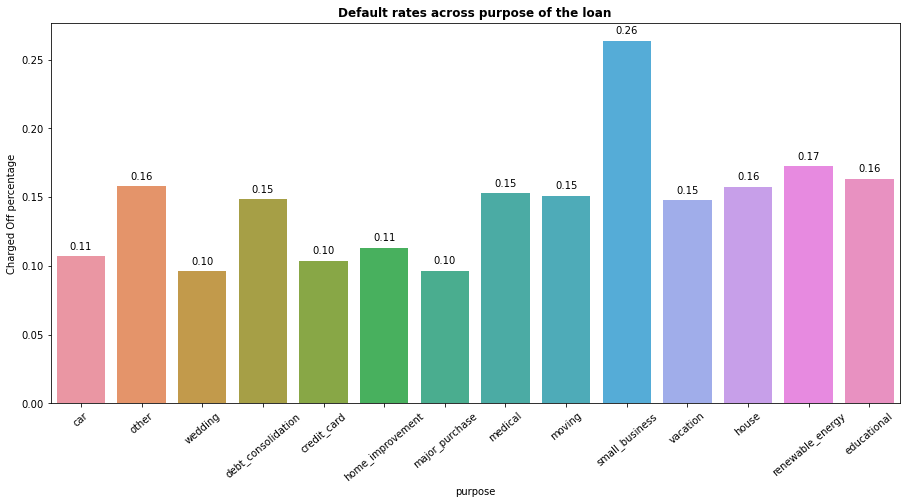

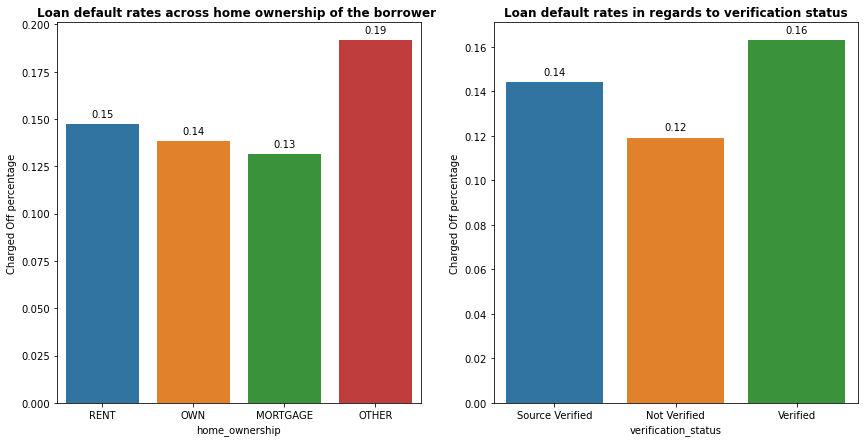

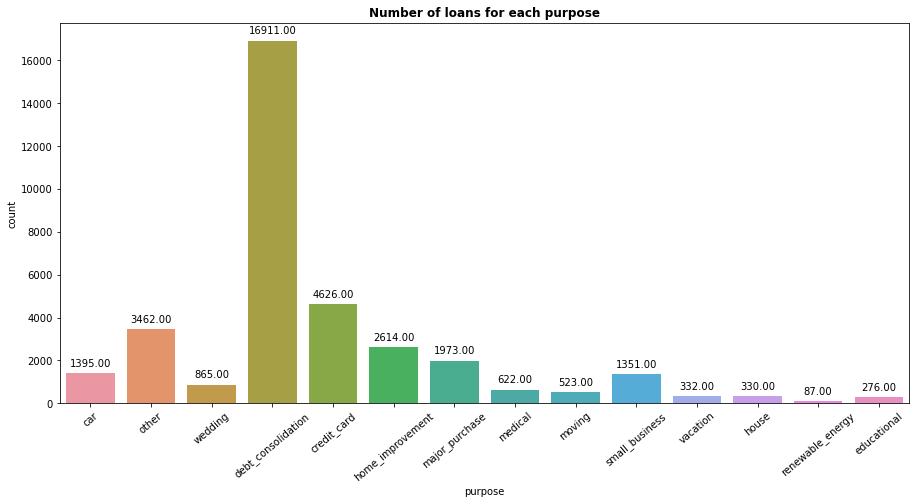

In [39]:
# Plot 1: plotting default rates across purpose of the loan
plt.figure(figsize=(70,7))
plt.subplot(1, 4, 1)
bx = sns.barplot(x ='purpose', y ='loan_status', data = loan_data, ci=None)
for p in bx.patches:
    bx.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Default rates across purpose of the loan", weight ='bold')
plt.xticks(rotation=40) 
plt.ylabel("Charged Off percentage")


plt.figure(figsize=(30,7))

# Plot 2: plotting loan default rates across home ownership of the borrower
plt.subplot(1, 4, 2)
bxc = sns.barplot(x ='home_ownership', y ='loan_status', data = loan_data, ci=None) 
for p in bxc.patches:
    bxc.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Loan default rates across home ownership of the borrower ", weight ='bold')
plt.ylabel("Charged Off percentage")

# Plot 3: plotting loan default rates in regards to verification status
plt.subplot(1, 4, 3)
bxcs = sns.barplot(x ='verification_status', y ='loan_status', data = loan_data, ci=None) 
for p in bxcs.patches:
    bxcs.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Loan default rates in regards to verification status", weight ='bold')
plt.ylabel("Charged Off percentage")

# Plot 4: PLotting the number of loans for each purpose
plt.figure(figsize=(70,7))
plt.subplot(1, 4, 4)
plt.xticks(rotation=40)
b = sns.countplot(x='purpose', data=loan_data)
for p in b.patches:
    b.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Number of loans for each purpose", weight ='bold')

plt.show()

<b>Observations</b> :
 - Loans taken for small business purposes default to a great extent compared to other purposes
 - Borrowers who are not owners, renters & mortgagers have the highest default rate followed by renters
 - Company Verified loans defaulted the most compared to others
 - Most of the loans were given for debt consolidation followed by credit card

### ‣ Bivariate Analysis

#### Plotting loan distribution over time (Years & Months)

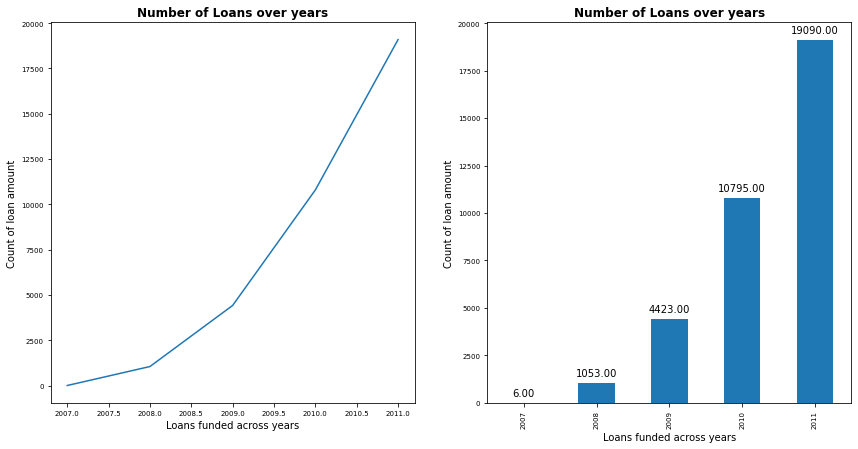

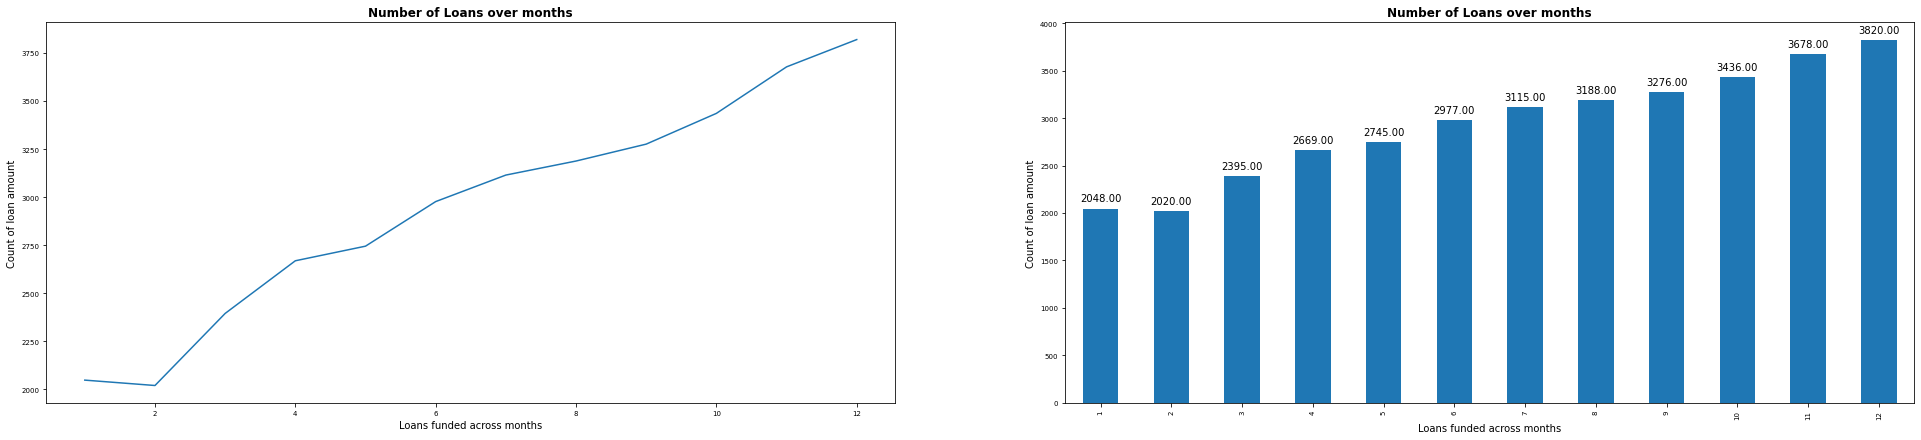

In [40]:
plt.figure(figsize=(30, 7))

# Plot 1: Line chart for loan distribution over years
plt.subplot(1, 4, 1)
loan_data.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.title("Number of Loans over years", weight ='bold')
plt.ylabel("Count of loan amount")
plt.xlabel("Loans funded across years")


# Plot 2: bar chart for loan distribution over years
plt.subplot(1, 4, 2)
cx = loan_data.groupby('issue_d_year').loan_amnt.count().plot(kind='bar', fontsize=7)
for p in cx.patches:
    cx.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Number of Loans over years", weight ='bold')
plt.ylabel("Count of loan amount")
plt.xlabel("Loans funded across years")

plt.figure(figsize=(70, 7))

# Plot 3: Line chart for loan distribution over months
plt.subplot(1, 4, 3)
loan_data.groupby('issue_d_month').loan_amnt.count().plot(kind='line', fontsize=7)
plt.title("Number of Loans over months", weight ='bold')
plt.ylabel("Count of loan amount")
plt.xlabel("Loans funded across months")


# Plot 4: Bar chart for loan distribution over months
plt.subplot(1, 4, 4)
dx = loan_data.groupby('issue_d_month').loan_amnt.count().plot(kind='bar', fontsize=7)
for p in dx.patches:
    dx.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Number of Loans over months", weight ='bold')
plt.ylabel("Count of loan amount")
plt.xlabel("Loans funded across months")

plt.show()

#### Plotting loan default rate over time (Years & Months)

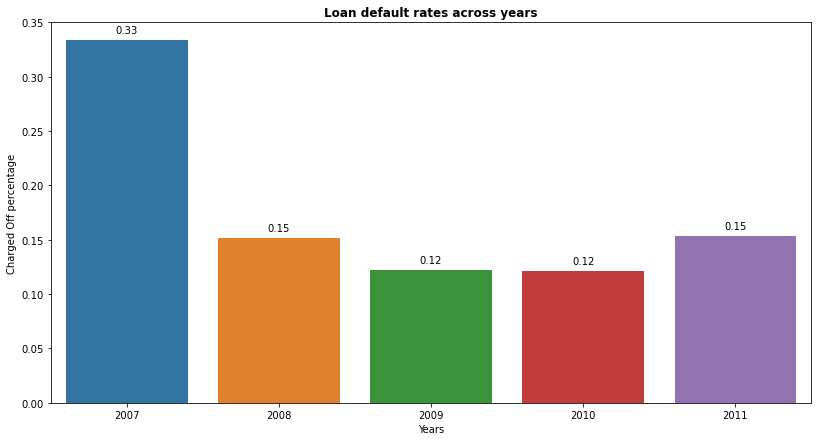

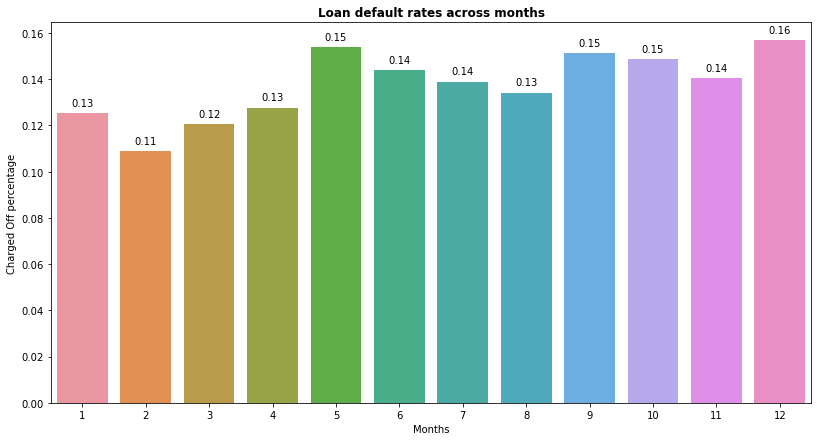

In [41]:
plt.figure(figsize=(30, 7))

# Plot 1: Bar chart for loan deafult rate over years
plt.subplot(1, 2, 1)
ex = sns.barplot(x='issue_d_year', y='loan_status', data=loan_data, ci=None)
for p in ex.patches:
    ex.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Loan default rates across years", weight ='bold')
plt.ylabel("Charged Off percentage")
plt.xlabel("Years")

plt.figure(figsize=(30, 7))

# Plot 2: Bar chart for loan deafult rate over months
plt.subplot(1, 2, 2)
exs = sns.barplot(x='issue_d_month', y='loan_status', data=loan_data, ci=None)
for p in exs.patches:
    exs.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Loan default rates across months", weight ='bold')
plt.ylabel("Charged Off percentage")
plt.xlabel("Months")

plt.show()

<b>Observations</b> :
 - Number of loans funded have increased gradually across years and months.
 - Although there isnt much variation for default rate in months, But for years it had increased back in 2011 and became equal to 2008, inspite of reducing in 2009 and 2010

#### Plotting loan amount distribution over annual income of borrowers

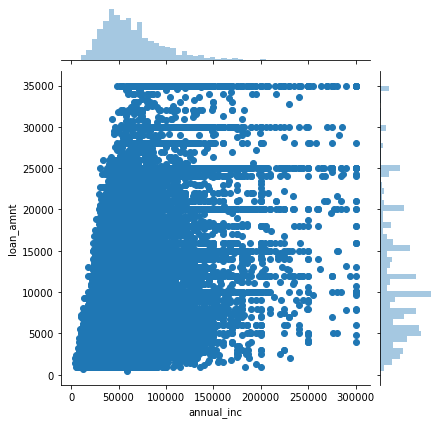

In [42]:
#Jointplot with annual income equal to or less than 300000
sns.jointplot('annual_inc', 'loan_amnt', loan_data.loc[loan_data['annual_inc']<=300000])
plt.show()

<b>Observation</b> : There are people with average income lower than 50000 taking loans of 25000 or higher and these would be high risk loans.

#### Plotting loan amount distribution over grade and sub grade

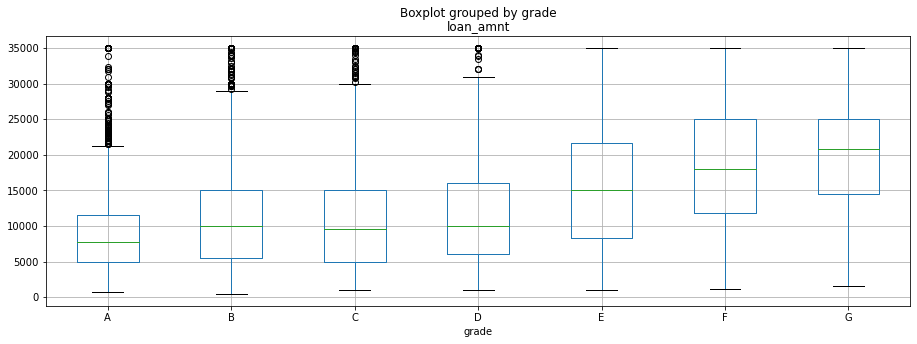

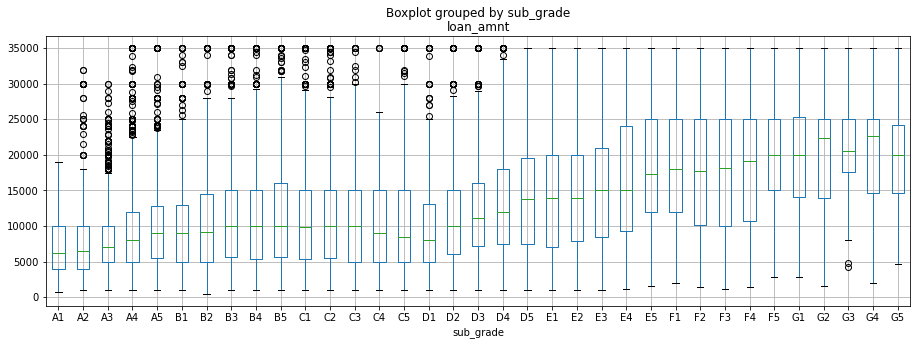

In [43]:
# Plot 1: Box plot for loan amount over grade
loan_data.boxplot(column='loan_amnt', by='grade', figsize=(15,5))
plt.show()

# Plot 2: Box plot for loan amount over sub grade
loan_data.boxplot(column='loan_amnt', by='sub_grade', figsize=(15,5))
plt.show()

<b>Observations</b> : 
- Large amount loans are given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.
- The same can be observed for sub grades where the median loan amount for a sub grade A5 is almost 10000 higher than that of a grade G5

#### Plotting interest rate over Term, Grade and Sub grade

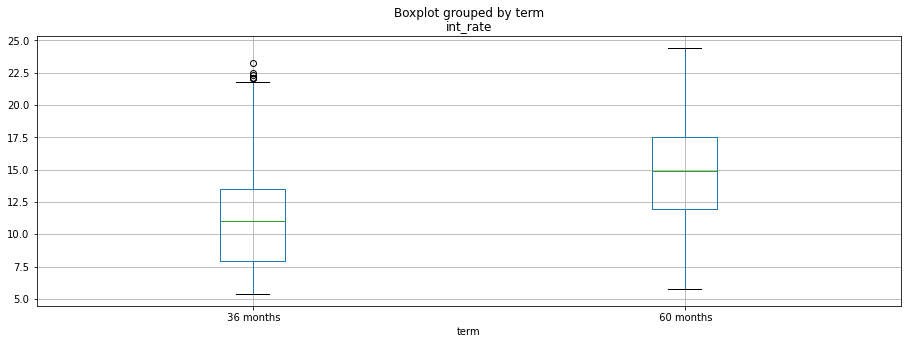

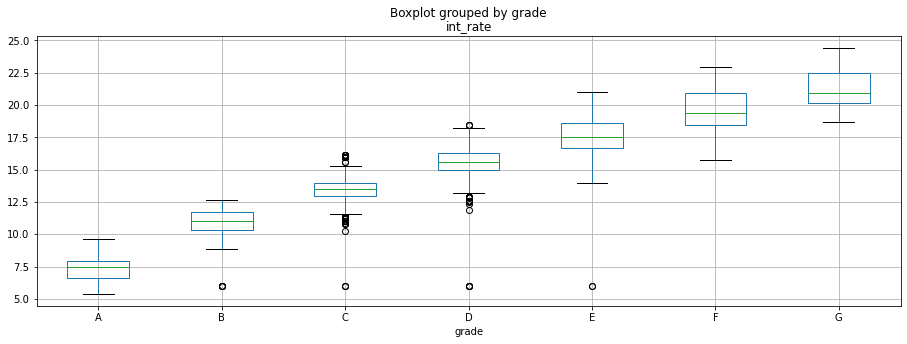

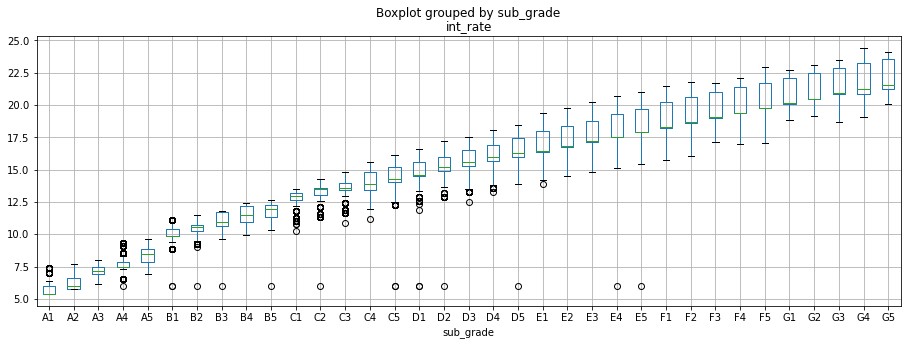

In [44]:
# Plot 1: Box plot for Interest rate over term
loan_data.boxplot(column='int_rate', by='term',figsize=(15,5))
plt.show()

# Plot 2: Box plot for Interest rate over grade
loan_data.boxplot(column='int_rate', by='grade',figsize=(15,5))
plt.show()

# Plot 3: Box plot for loan amount over sub grade
loan_data.boxplot(column='int_rate', by='sub_grade',figsize=(15,5))
plt.show()

<b>Observations</b> : 
- Large amounts of loans are given for 60 months term which there are higher interest rates
- If the grade or sub grade is large  then the rate of intrest for the loan is higher

#### Plotting distribution of loans over different states

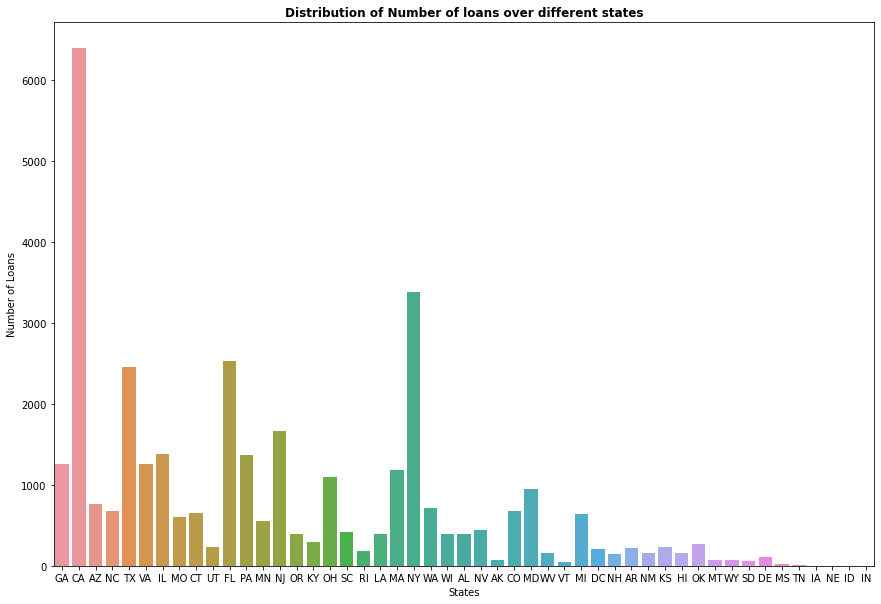

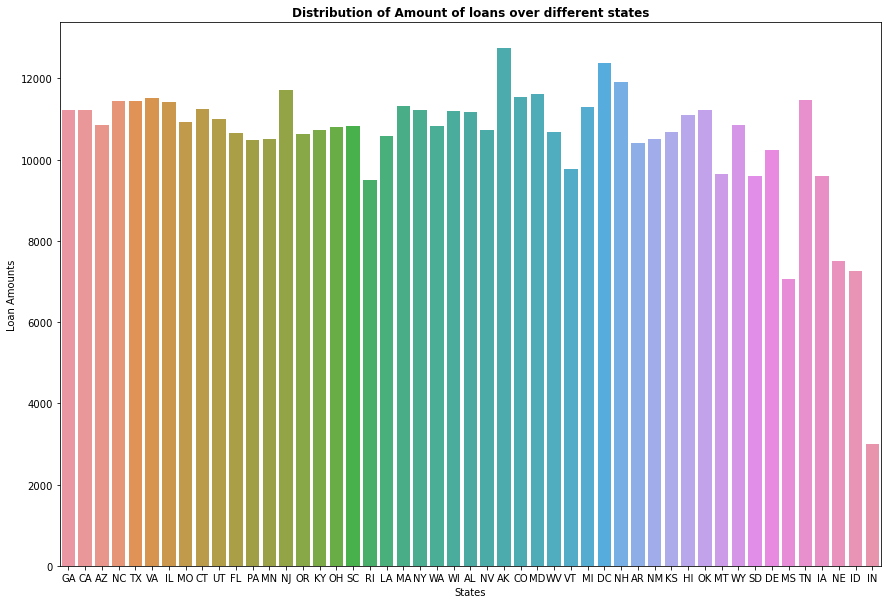

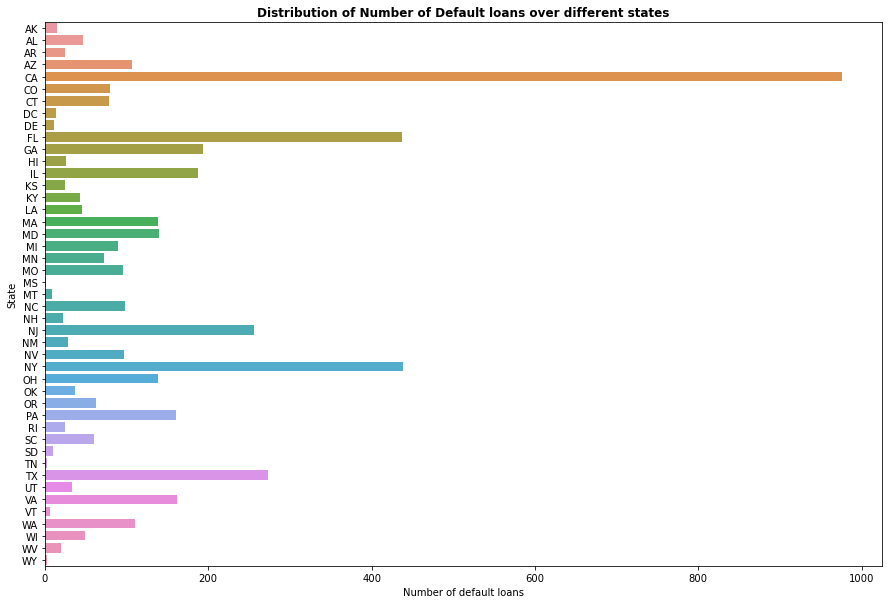

In [45]:
plt.figure(figsize=(50,10))
# Plot 1: Bar plot for distribution of Number of loans over different states
plt.subplot(1, 3, 1)
sns.countplot(x='addr_state',data=loan_data)
plt.title("Distribution of Number of loans over different states", weight ='bold')
plt.ylabel("Number of Loans")
plt.xlabel("States")

plt.figure(figsize=(50,10))
# Plot 2: Bar plot for distribution of Amount of loans over different states
plt.subplot(1, 3, 2)
sns.barplot(x='addr_state',y = 'loan_amnt', data=loan_data, ci=None)
plt.title("Distribution of Amount of loans over different states", weight ='bold')
plt.ylabel("Loan Amounts")
plt.xlabel("States")


plt.figure(figsize=(15,10))
# Plot 2: Bar plot for distribution of default loans over different states
default = loan_data[loan_data['loan_status']==1].groupby('addr_state')['loan_status'].count().reset_index()
sns.barplot(y='addr_state', x='loan_status', data=default)
plt.title("Distribution of Number of Default loans over different states", weight ='bold')
plt.xlabel('Number of default loans')
plt.ylabel('State')

plt.show()

<b>Observations</b> : 
- State of California (CA) has the highest number of loan applicants and with a higher probability of loans to be defaulted, followed by New York (NY) and Florida (FL)
- State of Alaska (AK) has the Highest average amount of loans compared to the others states

#### Plotting Annual income of borrowers over Number of public record bankruptcies

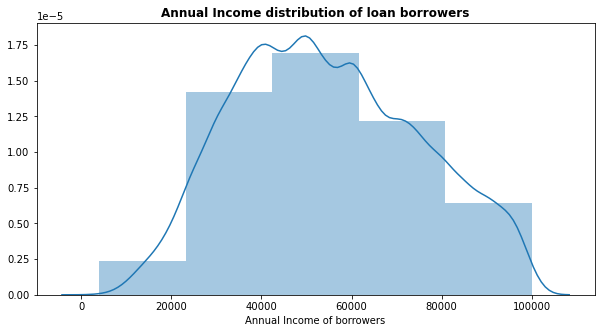

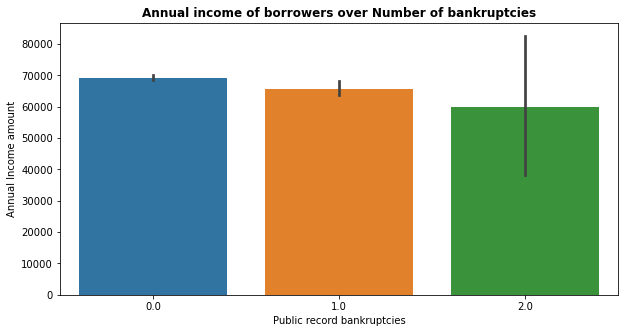

In [46]:
# Plot 1: dist plot for Annual Income distribution of loan borrowers
plt.figure(figsize=(10,5))
sns.distplot(loan_data[loan_data['annual_inc'] < 100000]['annual_inc'], bins=5)
plt.title('Annual Income distribution of loan borrowers', weight='bold')
plt.xlabel('Annual Income of borrowers')
plt.show()

# Plot 1: Bar plot for Annual income of borrowers over Number of bankruptcies
plt.figure(figsize=(10,5))
sns.barplot(y='annual_inc', x='pub_rec_bankruptcies', data=loan_data)
plt.title('Annual income of borrowers over Number of bankruptcies', weight='bold')
plt.xlabel('Public record bankruptcies')
plt.ylabel('Annual Income amount')
plt.show()

<b>Observations</b> : 
- Most loan applicants have annual income less than 5 lakhs
- We see that borrowers who have high annual income have no public records of bankruptcies but the variance is not huge compared others.